Getting all the necessary libraries in order to graph data from Berkley.

In [1]:
# Code referenced from Plotly: Advanced Global Warming Analysis from Kaggle
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

#using plotly
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import colorlover as cl
from plotly.subplots import make_subplots

Got the text file from Berkley (it's more updated from Kaggle includes up to 2024).
Text file was from this URL: https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Land_and_Ocean_summary.txtTemperatures.csv
This file is taken and converted to csv and then cleaned up.

In [9]:
import pandas as pd
# reading the text file and converting to csv
df = pd.read_csv('Land_and_Ocean_summary.txt', sep='\t', lineterminator='\r')
df.to_csv('Land_and_Ocean_summary.csv', index = None)
df.to_csv('Land_and_Ocean_summary.tsv', sep=',')
df.shape

(0, 1)

<Axes: >

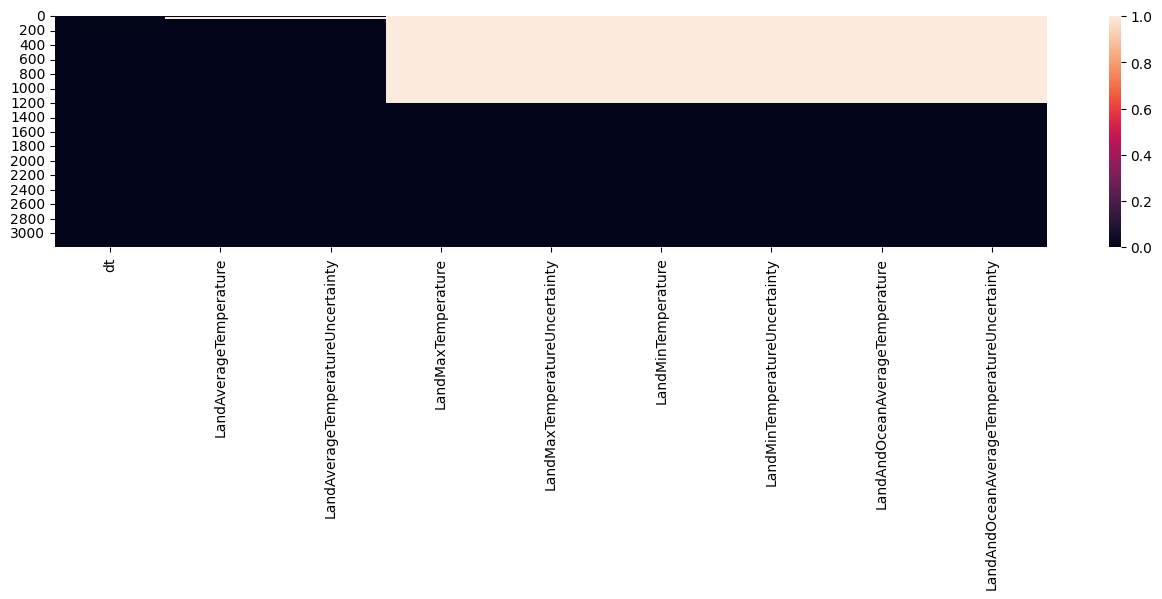

In [3]:
import seaborn as sns
#Reading data into df1
#df1 = pd.read_csv('Land_and_Ocean_summary.csv')
# I need to clean up the above csv which is a more updated version in order to use this, but
# for now, we will just use the Kaggle one.
df1 = pd.read_csv('dataset/GlobalTemperatures.csv')

df1.head(2)

#Making an additional df2 of data
df2 = df1.copy()

#Fixing the missing values
df1.isna().sum()
plt.figure(figsize = (16,3))
sns.heatmap(df1.isna())

In [4]:
# Missing data with listwise deletion
# so any rows that have one missing value would then be deleted.
df1.dropna(axis = 0, inplace = True)

# The below will not be needed if we use latest data from Berkley
#Modifying date to have the same format
df1['Date'] = pd.to_datetime(df1.dt)
df1_copy = df1.copy() # don't know why we are needing to df2 another set may just use df2
#removing the dt column
df1_copy.drop(columns = ['dt'], axis=1, inplace= True)

df1_copy['day'] = df1_copy['Date'].dt.day
df1_copy['week'] = df1_copy['Date'].dt.weekday
df1_copy['month'] = df1_copy['Date'].dt.month
df1_copy['year'] = df1_copy['Date'].dt.year

# Week data is not evenly distributed
df1_copy['week'].value_counts() # very uneven information on weeks

# For future analysis, we will work only on yearly data, as average (because there are dates missing and data is not consistent)
earth_data = df1_copy.groupby(by = 'year')[['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty']].mean().reset_index()

earth_data['turnpoint'] = np.where(earth_data['year'] <= 1975, 'before', 'after') # creating a new columns
earth_data.head(2)

year  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1850                7.900667                           0.876417   
1  1851                8.178583                           0.881917   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0           13.476667                       2.394833            1.964333   
1           13.081000                       2.397250            2.203917   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                       1.571167                       14.867167   
1                       1.632417                       14.991833   

   LandAndOceanAverageTemperatureUncertainty turnpoint  
0                                   0.308167    before  
1                                   0.312083    before

Summary Statistics 1850-2010
(I want to get the latest, but just to get this out, I'll modify later)
Should give me 166 observations.

In [29]:
#Summary Statistics
earth_data[['LandAverageTemperature', 'LandMaxTemperature', 
       'LandMinTemperature', 'LandAndOceanAverageTemperature']].describe()

LandAverageTemperature  LandMaxTemperature  LandMinTemperature  \
count              166.000000          166.000000          166.000000   
mean                 8.571583           14.350601            2.743595   
std                  0.473687            0.447741            0.614124   
min                  7.558583           13.081000            1.525083   
25%                  8.195708           14.055917            2.262562   
50%                  8.540750           14.307708            2.734917   
75%                  8.791250           14.539167            3.126833   
max                  9.831000           15.572667            4.148833   

       LandAndOceanAverageTemperature  
count                      166.000000  
mean                        15.212566  
std                          0.298629  
min                         14.740083  
25%                         14.991208  
50%                         15.144208  
75%                         15.379104  
max                         16.058583

Now we use plotly to get the Land Average Temperature for 1750 to 2010 - again I will try to use a newer version from Berkley lat will be newer than 2010.
Land Average Temperature had a steady increase: quite flat variation until mid 1800, and then started to increase slowly (when the first Industrial Revolution ended, and the effects were starting to show up on the environment). Somewhere in the 1970s the growth started to accelerate. The 1970s mark an increasing trend in machine automation, meaning a bust in foreign trading, so the production started to surge.

In [5]:
# Creating the dataset - using df2
df2['Date'] = pd.to_datetime(df2.dt)
df2['year'] = df2['Date'].dt.year
land_avg = df2.groupby('year')[['LandAverageTemperature', 'LandAverageTemperatureUncertainty']].mean().reset_index()

# Creating the graph
fig = go.Figure()
fig.update_layout(title="Land Average Temperature: 1750-2010", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                  template = "ggplot2", hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

fig.add_trace(go.Scatter(x = land_avg['year'], y = land_avg['LandAverageTemperature'], mode = 'lines',
                        name = 'Land Avg Temp', marker_color='rgb(128, 0, 0)'))

fig.add_trace(go.Scatter(x = land_avg['year'], y = land_avg['LandAverageTemperatureUncertainty'], mode = 'lines',
                        name = 'Land Avg Temp Error', marker_color = 'rgb(107,142,35)'))

When Global Warming started.
Increase in land and ocean are the same.  Industrial Revolution in 1900 and 1975 including population increase that started in 1975.

In [6]:
# Figure layout
fig = make_subplots(rows=2, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="When Global Warming Started?",font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                 template = "ggplot2", title_font_size = 20, hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

# Figure data
fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandAverageTemperature'], mode = 'lines',
                        name = 'Land Avg Temp', marker_color='rgb(128, 0, 0)'), row = 1, col = 1)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[7.5, 10], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 1, col = 1)
#=============================================================================
fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandMinTemperature'], mode = 'lines',
                        name = 'Land Min Temp', marker_color='rgb(210,105,30)'), row = 1, col = 2)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[1.5, 4.5], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 1, col = 2)
#=============================================================================
fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandMaxTemperature'], mode = 'lines',
                        name = 'Land Max Temp', marker_color='rgb(135,206,235)'), row = 2, col = 1)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[13, 15.5], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 2, col = 1)
#=============================================================================
fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandAndOceanAverageTemperature'], mode = 'lines',
                        name = 'Land&Ocean Avg Temp', marker_color='rgb(107,142,35)'), row = 2, col = 2)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[14.5, 16], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 2, col = 2)

Land Average Temperature increase from 1975 to 2010 - 8.37 to 9.20
Land Minimum Temperature increase from 1975 to 2010 - 2.45 to 3.64
Land Maximum Temperature increase from 1975 to 2010 - 14.18 to 14.89
Land and Ocean Average Temperature from 1975 to 2010 - 15.06 to 15.62

In [7]:
# Change in average temperature before/after 1975

# Figure layout
fig = make_subplots(rows=2, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="Average Temperatures before and after 1975",font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                 template = "ggplot2", title_font_size = 20, hovermode= 'closest')

# Figure data
fig.add_trace(go.Box(x = earth_data['LandAverageTemperature'], y = earth_data['turnpoint'],boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(128, 0, 0)', boxmean = True, name = 'Land Avg Temp'),
             row = 1, col = 1)
fig.add_trace(go.Box(x = earth_data['LandMinTemperature'], y = earth_data['turnpoint'],boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(210,105,30)', boxmean = True, name = 'Land Min Temp'),
             row = 1, col = 2)
fig.add_trace(go.Box(x = earth_data['LandMaxTemperature'], y = earth_data['turnpoint'],boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(135,206,235)', boxmean = True, name = 'Land Max Temp'),
             row = 2, col = 1)
fig.add_trace(go.Box(x = earth_data['LandAndOceanAverageTemperature'], y = earth_data['turnpoint'], boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(107,142,35)', boxmean = True, name = 'Land&Ocean Avg Temp'),
             row = 2, col = 2)


fig.update_traces(orientation='h')

Now based on countries

In [25]:
# Read the file (countries + cities)
countries = pd.read_csv("dataset/GlobalLandTemperaturesByCity.csv")

# Because the file is very big and there are many dates missing (like the last file), we will group by year
# create column year
countries['Date'] = pd.to_datetime(countries['dt'])
countries['year'] = countries['Date'].dt.year

# Group by year
#by_year = countries.groupby(by = [['year', 'City', 'Country', 'Latitude', 'Longitude']]).mean().reset_index()
#by_year = countries.groupby([['year', 'City', 'Country', 'Latitude', 'Longitude']]).mean().reset_index()
by_year = countries.groupby(['City', 'Country', 'Latitude', 'Longitude', 'AverageTemperature']).agg('year').mean().reset_index()

# Append the continent & iso codes
continent_map = pd.read_csv("dataset/continents2.csv")
continent_map['Country'] = continent_map['name']
continent_map = continent_map[['Country', 'region', 'alpha-2', 'alpha-3']]

# Add information
data = pd.merge(left = by_year, right = continent_map, on = 'Country', how = 'left')

# Filter starting 1825 - because some countries weren't monitored before this year on some periods, 
# the mean overall could be quite misleading (example: Americas have an increase from 1821 to 1825 of 5 points in temperature,
# but this happens only because in 1824 data for South America started to be collected)
data = data[data['year'] >= 1825]

# Datasets:

#region = data.dropna(axis = 0).groupby['region', 'year'].mean().reset_index()
#countries = data.dropna(axis = 0).groupby['region', 'Country', 'year'].mean().reset_index()
#cities = data.dropna(axis = 0).groupby['region', 'Country', 'City', 'year', 'Latitude', 'Longitude'].mean().reset_index()

#Modified to add aggreates for year only.
region = data.dropna(axis = 0).groupby(['region']).agg('year').mean().reset_index()
countries = data.dropna(axis = 0).groupby(by=['region', 'Country']).agg('year').mean().reset_index()
cities = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'City', 'Latitude', 'Longitude']).agg('year').mean().reset_index()

In [24]:
# Figure layout
fig = make_subplots(rows=1, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="Continents increase in Average Temperature", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                  template = "ggplot2", hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

#============================= Scatter =============================
fig.add_trace(go.Scatter(x = region[region['region'] == 'Europe']['year'], y = region[region['region'] == 'Europe']['AverageTemperature'], mode = 'lines',
                        name = 'Europe', marker_color='rgb(128, 0, 0)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Americas']['year'], y = region[region['region'] == 'Americas']['AverageTemperature'], mode = 'lines',
                        name = 'Americas', marker_color='rgb(210,105,30)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Asia']['year'], y = region[region['region'] == 'Asia']['AverageTemperature'], mode = 'lines',
                        name = 'Asia', marker_color='rgb(135,206,235)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Africa']['year'], y = region[region['region'] == 'Africa']['AverageTemperature'], mode = 'lines',
                        name = 'Africa', marker_color='rgb(107,142,35)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Oceania']['year'], y = region[region['region'] == 'Oceania']['AverageTemperature'], mode = 'lines',
                        name = 'Oceania', marker_color='rgb(70,130,180)'), row = 1, col = 1)

#============================= Bar =============================
y1 = np.round(region.groupby(by = 'region')['AverageTemperature'].mean().tolist(), 1)
y2 = np.round(region.groupby(by = 'region')['AverageTemperature'].max().tolist(), 1)

fig.add_trace(go.Bar(x = region['region'].unique(), y = region.groupby(by = 'region')['AverageTemperature'].mean().tolist(), 
                     name = 'Mean Temp', marker_color = 'rgb(188,143,143)', text = y1, textposition = 'auto'),
              row = 1, col = 2)
fig.add_trace(go.Bar(x = region['region'].unique(), y = region.groupby(by = 'region')['AverageTemperature'].max().tolist(), 
                     name = 'Max Temp', marker_color = 'rgb(222,184,135)', text = y2, textposition = 'auto'),
              row = 1, col = 2)